In [52]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
#Importing the csv files into dataframes (both train and test)

dftrain = pd.read_csv("/content/drive/MyDrive/WOC/Linear_train.csv", header = [0])
del dftrain['Unnamed: 0']
dftest = pd.read_csv("/content/drive/MyDrive/WOC/Linear_test.csv", header = [0])
del dftest['Unnamed: 0']

In [54]:
#Functions

def importing(dataframe):
    X = dataframe.iloc[:,1:].transpose() 
    features = X.shape[0]
    examples = X.shape[1]
    Y = dataframe.iloc[:,0].to_numpy()
    return X, Y, features, examples

Xtrain, Ytrain, trainfeatures, trainexamples = importing(dftrain)
Xtest, Ytest, testfeatures, testexamples = importing(dftest)

def standardization(X):
  features = X.shape[0]
  for i in range(1,features):
    rowmin = X.iloc[i,:].min()
    rowmean = X.iloc[i,:].mean()
    rowstd = X.iloc[i,:].std()
    X.iloc[i,:] -= rowmin
    X.iloc[i,:] -= rowmean
    X.iloc[i,:] /= rowstd
  return X.to_numpy()

Xtrain = standardization(Xtrain)
Xtest = standardization(Xtest)

In [55]:
#Appending row with all ones to Xtrain

def appending(X, examples):
  Xones = np.ones((1,examples))
  X = np.concatenate((Xones, X))
  return X

Xtrain = appending(Xtrain, trainexamples)
Xtest = appending(Xtest, testexamples)

In [60]:
#Applying linear regression on the dataset

X = Xtrain
Y = Ytrain.reshape(1, trainexamples)
theta = np.random.randn(trainfeatures+1, 1)
iteration = 10000
learningrate = 0.0000001
def linear(X, Y, theta, learningrate, iteration):
  costlist = []
  for i in range(iteration):
    y_pred = np.dot(X.T, theta).T
    diff = (y_pred - Y).reshape(trainexamples, 1)
    cost = (1/(2*trainexamples))*(np.sum(np.square(diff)))
    pdcost = (1/trainexamples)*np.dot(X, diff)
    theta -= learningrate*pdcost
    costlist.append(cost)
  return theta, y_pred, costlist

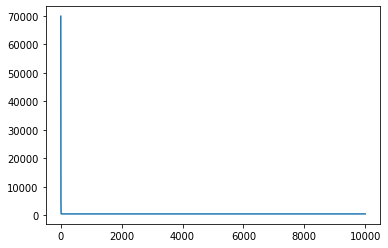

In [61]:
#Using the function

theta, y_pred, costlist = linear(Xtrain, Ytrain, theta, learningrate, iteration)
plt.plot([i for i in range(iteration)], costlist)

In [62]:
#Using the theta on Xtest

Ypredfinal = np.dot(Xtest.T, theta)

In [63]:
#Finding the error

Yfinal = Ytest.reshape(testexamples, 1)
rmserror = np.sqrt((np.sum(np.square(Yfinal - Ypredfinal)))/testexamples)
print(rmserror)

29.424292660680106
